## Bivariate Analysis

* Bivariate analysis is a statistical method that helps you study relationships (correlation) between data sets

### Quantitative vs. Quantitative
    1. Scatterplot
    2. Line plot

### Categorical vs. Quantitative
    1. Bar chart (on summary statistics)
    2. Grouped kernel density plots
    3. Box plots
    4. Violin plots


### Categorical vs. Categorical
    1. Stacked bar chart
    2. Grouped bar chart
    3. Segmented bar chart


## Case study 1


### Problem Feature:(Heart Disease)

### Data Set: 

   * age - age in years 
   * sex - (1 = male; 0 = female) 
   * cp - chest pain type 
   * trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
   * chol - serum cholestoral in mg/dl 
   * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
   * restecg - resting electrocardiographic results 
   * exang - exercise induced angina (1 = yes; 0 = no) 
   * oldpeak - ST depression induced by exercise relative to rest 
   * slope - the slope of the peak exercise ST segment 
   * ca - number of major vessels (0-3) colored by flourosopy 
   * thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
   * target - have disease or not (1=yes, 0=no)



### 1.1 Loading the libraries

In [1]:
import pandas as pd 
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt


### 1.2 import the dataset ?

In [2]:
heart=pd.read_csv('C:\\Users\\AVIRAJ\\Downloads\\heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1.3 How to see the size of your data?

In [3]:
print("Heart-Columns={} and Rows={}".format(heart.shape[1],heart.shape[0]))

Heart-Columns=14 and Rows=303


### 1.4 How to view the statistical characteristics of the data?

In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.5 How to see just one column?

In [5]:
heart['age']

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

### 1.6 How to check the column names?

In [7]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### 1.7 Find the Numerical Features,Categorical Features, Alphanumeric Features?

In [10]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Change the column names?

In [13]:
#Change the sex(0,1)=(female,male)
heart['sex'].replace({0:'Female',1:'Male'},inplace=True)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


## 1.8 Categorical vs. Quantitative

    * Categorical: chest_pain_type, Sex, fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_slope,thalassemia
    * Numerical Features: Age (Continuous), resting_blood_pressure ,cholesterol,max_heart_rate_achieved,st_depression, num_major_vessels,target

### 1.8a) Create bar plot for showing Gender and target. And your Observation:

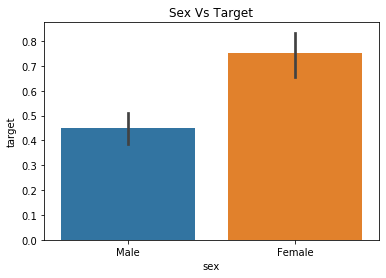

Percentage of Males with Heart Disease= 44.927536231884055 %
Percentage of Females with Heart disease= 75.0 %


In [71]:

#draw a bar plot of target by sex
sns.barplot(x=heart['sex'],y=heart['target'])
plt.title('Sex Vs Target')
plt.show()

#print percentages of females vs. males Heart Disease

a=heart.groupby(by=['sex','target'])
b=a['target'].value_counts()[1] ## Count of Females with Heart Disease
d=a['target'].value_counts()[3]## Count of Males with Heart Disease 
c=heart['sex'].value_counts()['Male']
print("Percentage of Males with Heart Disease=",(d/heart['sex'].value_counts()[0])*100,"%")
print("Percentage of Females with Heart disease=",(b/heart['sex'].value_counts()[1])*100,"%")

### Observation:



In [ ]:
We can see that females are having significantly higher heart disease than the males.
They are more prone to heart diseases than the male counterparts.

### 1.8b) Create Bar plot for checking the both target vs Sex. And your Observations?

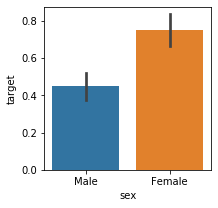

In [74]:
#create a subplot
f,ax=plt.subplots(1,1,figsize=(3,3))
sns.barplot(y=heart['target'],x=heart['sex'])
plt.show()








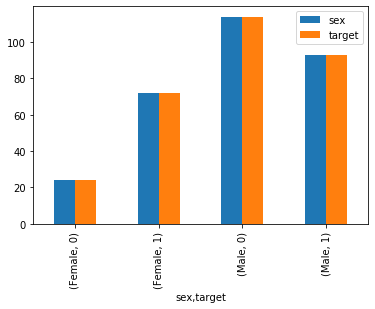

In [78]:
# create bar plot using groupby
a=heart.groupby(by=['sex','target'])
a['sex','target'].count().plot(kind='bar')
plt.show()

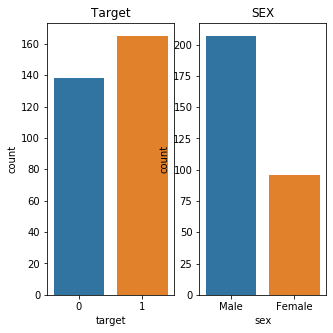

In [84]:
# create count plot
f,ax=plt.subplots(1,2,figsize=(5,5))
sns.countplot(heart['target'],ax=ax[0])
ax[0].set_title('Target')
sns.countplot(heart['sex'],ax=ax[1])
ax[1].set_title('SEX')
plt.show()

#### Observation:
   

In [ ]:
1)Here we see that most females are having heart disease than males.
Hence these females are hence more prone to heart disease which maybe because of variety of reasons.

### 1.8d) Create Bar plot for checking the both Number Of people having chest_pain_type vs chest_pain_type:Heart Disease or Not. And your Observations?

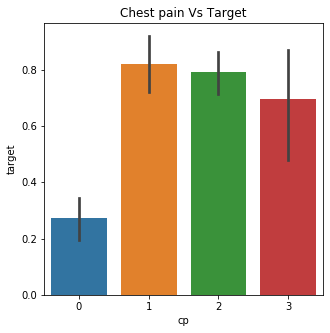

In [106]:
# create subplot plot
f,ax=plt.subplots(1,1,figsize=(5,5))
sns.barplot(x=heart['cp'],y=heart['target'],ax=ax)
ax.set_title('Chest pain Vs Target')
plt.show()





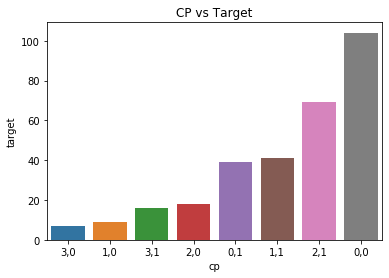

In [29]:
# create bar plot using groupby
a=heart.groupby(by=['target','cp'])
b=a['cp','target'].count()
label=['3,0','1,0','3,1','2,0','0,1','1,1','2,1','0,0']
ax=sns.barplot(x=b['cp'],y=b['target'])
ax.set_xticklabels(label)
plt.title('CP vs Target')
plt.show()

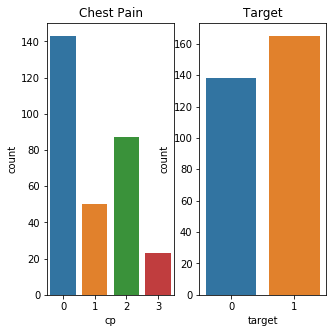

In [119]:
# create count plot
f,ax=plt.subplots(1,2,figsize=(5,5))
sns.countplot(heart['cp'],ax=ax[0])
ax[0].set_title('Chest Pain')
sns.countplot(heart['target'],ax=ax[1])
ax[1].set_title('Target')
plt.show()

#### Observation:

  

In [ ]:
We see that most patients who are not having heart disease belong to chest-pain 0.
Also the most dangerous chest pain type is 2 where most heart patients lie.

### 1.8c) Create violinplot plot for checking the fasting_blood_sugar and Age vs target'. And your Observations?

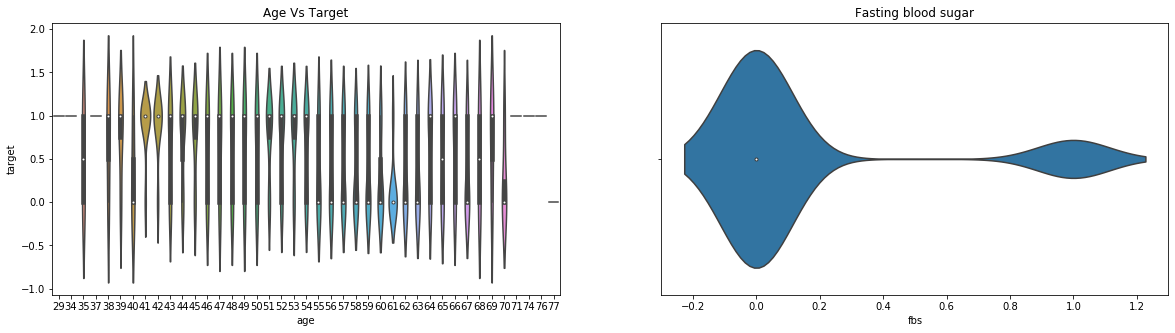

In [128]:
# create subplot plot
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.violinplot(x=heart['age'],y=heart['target'],ax=ax[0])
ax[0].set_title('Age Vs Target')
sns.violinplot(heart['fbs'],ax=ax[1])
ax[1].set_title('Fasting blood sugar')
plt.show()





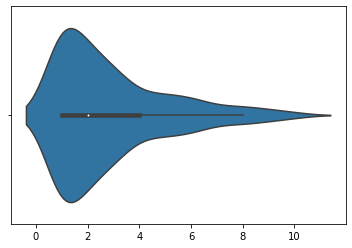

In [139]:
# create violinplot plot using groupby
a=heart.groupby(by=['age','target','fbs'])
b=a['age','target','fbs'].count()
sns.violinplot(b)
plt.show()

#### Observations:

   

In [ ]:
Here from the violinplot,we mostly infer that as age increases,so does the heart disease rate.
The heart disease rate starts from the age of 40 itself and may continue lifelong.

## Box Plot
a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, 

### 1.8 d)create a box plot for Sex & Age . And your Observations?

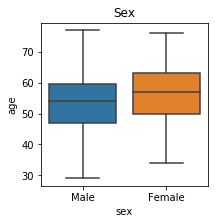

In [143]:
# create boxplot
f,ax=plt.subplots(1,1,figsize=(3,3))
sns.boxplot(x=heart['sex'],y=heart['age'],ax=ax)
ax.set_title('Sex')
plt.show()

### Observations: 
    

In [ ]:
We see that the average males are of 55 years and females are of around 57 years in the dataset.
Moreover the range of age values for males are more than the females.
Hence most female ages range between 50-62 whereas male ages range between 48-60.

# 1.9 Categorical vs. Categorical

* Categorical: target, Sex.

### Stacked bar chart

A stacked bar chart, also known as a stacked bar graph, is a graph that is used to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Different colors are used to illustrate the different categories in the bar.



### 1.9a) Create a Stacked bar chart for showing target & Sex. And your Observations?

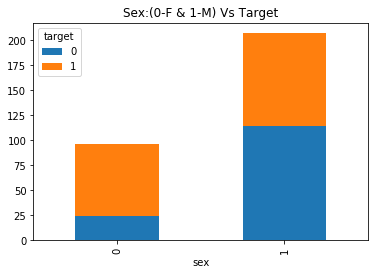

In [14]:
#create crosstab
pd.crosstab(heart['sex'],heart['target']).plot(kind='bar',stacked=True)
plt.title('Sex:(0-F & 1-M) Vs Target')
plt.show()

#### Observations:
    
    

In [ ]:
For Females,we see a large percentage are having the disease which is much higher than male percentage.
Hence Females maybe prone to Heart diseases more according to the dataset.

# 1.10 Quantitative vs. Quantitative

### 1.10a) Create a scatter plot for showing age & st_depression. And your Observations?¶

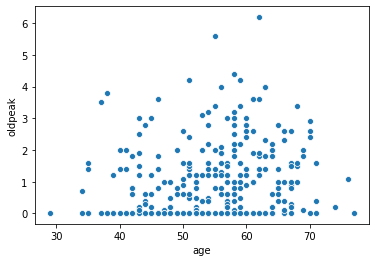

In [8]:
sns.scatterplot(x=heart['age'],y=heart['oldpeak'])
plt.show()

Observation:
   

In [ ]:
The ST Depression is caused mainly after the age of 50.Hence this maybe a cause due to Old age.
Moreover at the age range of 50-60,the value of ST Depression also increases.


# 2. Seasonality and looking at trended data:


### 2. 1 Create a Seasonality and looking at trended data. And write your Observations?


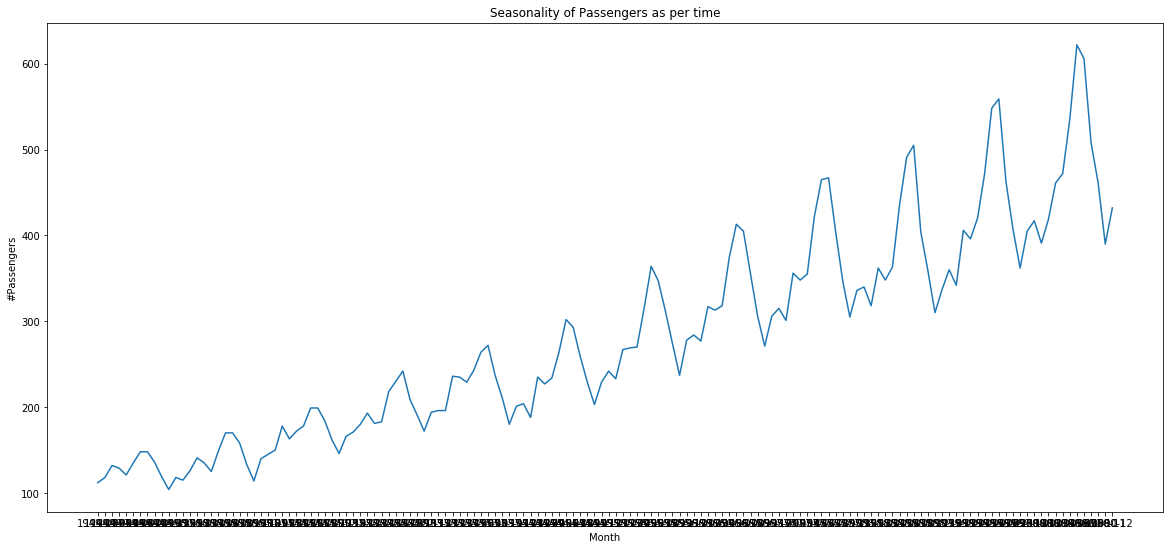

In [25]:
#Load the data = AirPassengers.csv
air=pd.read_csv('C:\\Users\\AVIRAJ\\Downloads\\AirPassengers.csv')

# Plot subplot 
plt.subplots(figsize=(20,9))
sns.lineplot(x=air['Month'],y=air['#Passengers'])
plt.title('Seasonality of Passengers as per time')
plt.show()

Observations:


In [27]:
We can observe that time & passenger count are positively correlated.
Hence the values are directly proportional to each other.


# THE END